In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [2]:
df = pd.read_excel('../data/hemp-gcms-ori-transpose.xlsx')
df

,Type1,"(2R,4R)-2,4 imethyl-1-heptanol","(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol","(3methyl,24R)-ergost-5-en-3-ol",(E)-24-Propylidenecholesterol,1-Docosanol,1-Octadecanol,"2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol","2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde",2-Monoolein,...,Stearic acid,"Stearic acid, ethyl ester",Stigmasterol,Tetrahydrocannabivarin (THCV),THC (Dronabino)l,Trilinolein,Triterpenoid,Tyramine,Vitamin E,Vitamin E succinate (calcium)
0,1,0.00,0.00,3.78,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.20,3.36,0.00,2.40,0.00,0.00,12.63
1,1,0.00,0.00,0.00,0.00,0.00,1.39,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.92,0.00,0.00,0.00,0.00,0.00,1.45,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,2,0.00,5.95,7.61,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.41,0.00,0.00,0.00,1.66,0.00,1.25,14.16
7,2,1.23,0.00,0.00,1.73,1.06,1.17,0.00,1.83,2.53,...,1.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,2,0.00,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,...,0.00,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,2,0.00,4.30,5.28,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.45,5.62,18.20,0.00,2.18,0.00,0.00,15.10


In [3]:
column_name = df.columns
column_name

Index(['Type1', '(2R,4R)-2,4 imethyl-1-heptanol',
       '(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol',
       '(3methyl,24R)-ergost-5-en-3-ol', '(E)-24-Propylidenecholesterol',
       '1-Docosanol', '1-Octadecanol',
       '2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol',
       '2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde',
       '2-Monoolein', '2-Pentylfuran', '2,4-Di-tert-butylphenol',
       '2,3(Z)-ethylcholestanol',
       '3-Amino-2-methyl-3-(4-methylphenyl)-1-phenyl-1-propanol',
       '4H-Pyran-4-one, 2,3-dihydro-3,5-dihydroxy-6- methyl-',
       '5-Pentyl-2(5H)-furanone', '7-Ethyl-4-nonanone',
       '9-Octadecenoic acid, (2-phenyl-1,3-dioxolan-4- yl) methyl ester, cis-',
       'Benzoic acid, 4-ethoxy-, ethyl ester', 'Campesterol',
       'Cannabidiol (CBD)', 'Cannabinol (CBN)', 'Clionasterol', 'Crocetane',
       'Cycloartenol', 'Decadienal, (2E,4E)-2,4-',
       'Gluco-octonic acid lactone', 'Glycerin', 'glycerol, 2-Palmitoyl',
       '

In [4]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [5]:
df_features = df.drop('Type1', axis=1)
df_features

,"(2R,4R)-2,4 imethyl-1-heptanol","(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol","(3methyl,24R)-ergost-5-en-3-ol",(E)-24-Propylidenecholesterol,1-Docosanol,1-Octadecanol,"2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol","2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde",2-Monoolein,2-Pentylfuran,...,Stearic acid,"Stearic acid, ethyl ester",Stigmasterol,Tetrahydrocannabivarin (THCV),THC (Dronabino)l,Trilinolein,Triterpenoid,Tyramine,Vitamin E,Vitamin E succinate (calcium)
0,0.00,0.00,3.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.20,3.36,0.00,2.40,0.00,0.00,12.63
1,0.00,0.00,0.00,0.00,0.00,1.39,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.92,0.00,0.00,0.00,0.00,0.00,1.45,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,2.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,5.95,7.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.41,0.00,0.00,0.00,1.66,0.00,1.25,14.16
7,1.23,0.00,0.00,1.73,1.06,1.17,0.00,1.83,2.53,1.58,...,1.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,1.04,0.00,0.00,0.00,...,0.00,2.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,4.30,5.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.45,5.62,18.20,0.00,2.18,0.00,0.00,15.10


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[-0.30151134, -0.52738661,  0.94431323, -0.30151134, -0.42545243,
        -0.56941159, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
        -0.42298357, -0.30151134, -0.57584825, -0.55414623, -0.22788212,
         2.94058818,  0.74721752, -0.30151134,  0.95196148, -0.44570055,
        -0.30151134, -0.30151134, -0.30151134, -0.42398833, -0.30151134,
        -0.30151134,  0.4374522 , -0.30151134, -0.18401941, -0.68720363,
        -0.53756823, -0.30151134, -0.30151134, -0.55662427, -0.30151134,
        -0.30151134, -0.43514387, -0.43447484, -0.44471607,  3.31662479,
        -0.30151134,  3.14483027, -0.45009122, -0.72393674, -0.30151134,
         0.95199282, -0.30151134, -0.55859074, -0.44716112,  0.19326536,
         0.20461893, -0.30151134,  2.05705202, -0.30151134, -0.30151134,
         1.50236195],
       [-0.30151134, -0.52738661, -0.54868252, -0.30151134, -0.42545243,
         1.67592773, -0.30151

In [7]:
label_encoder = LabelEncoder()
hemp_type_encoded = label_encoder.fit_transform(df_type)
hemp_type_encoded

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
pls = PLSRegression(n_components=2)


kf = KFold(n_splits=5, shuffle=True, random_state=42)
SSE = 0
SSO = 0

for train_index, test_index in kf.split(scaled_data):
    X_train, X_test = scaled_data[train_index], scaled_data[test_index]
    Y_train, Y_test = hemp_type_encoded[train_index], hemp_type_encoded[test_index]
    
    
    pls.fit(X_train, Y_train)
    
    
    Y_pred = pls.predict(X_test)
    
    
    SSE += np.sum((Y_test - Y_pred) ** 2)
    SSO += np.sum((Y_test - np.mean(Y_train)) ** 2)

In [9]:
pls_da = PLSRegression(n_components=2)
X_scores, Y_scores = pls_da.fit_transform(scaled_data, hemp_type_encoded)

pls_da_scores = X_scores

pls_da_loadings = pls_da.x_weights_

print("PLS-DA Component Loadings:")
print(pls_da_loadings)

feature_importance = np.sum(np.square(pls_da_loadings), axis=0)
print("Sum of Squared Loadings (Feature Importance) for Each Component:")
print(feature_importance)

PLS-DA Component Loadings:
[[-0.12363801  0.01195374]
 [-0.21626063 -0.05084482]
 [-0.12295672 -0.11623738]
 [-0.12363801  0.01195374]
 [-0.17446141  0.02616555]
 [-0.08003912 -0.0610153 ]
 [-0.12363801  0.32391824]
 [-0.12363801  0.01195374]
 [-0.12363801  0.01195374]
 [-0.12363801  0.01195374]
 [ 0.12363801  0.0949101 ]
 [-0.12363801  0.02212502]
 [ 0.12363801  0.0949101 ]
 [-0.12363801  0.06807198]
 [-0.12363801  0.01195374]
 [-0.0543555  -0.05398895]
 [-0.12363801  0.01195374]
 [-0.07951412 -0.06323645]
 [-0.14369921  0.04741588]
 [-0.12592414 -0.04208395]
 [ 0.17226003 -0.19958644]
 [-0.17098476 -0.11348073]
 [-0.12363801  0.02212502]
 [-0.16091266 -0.1037169 ]
 [-0.01375908 -0.08274305]
 [-0.12363801  0.06807198]
 [ 0.12363801  0.0949101 ]
 [-0.12363801  0.32391824]
 [-0.05324729  0.29547955]
 [-0.12363801  0.06807198]
 [-0.12363801  0.06807198]
 [-0.185107   -0.09454816]
 [-0.12363801 -0.04384287]
 [ 0.30030198 -0.10040124]
 [ 0.13135565  0.19833572]
 [ 0.01869295  0.23683156]
 

In [10]:
y_pred = pls_da.predict(scaled_data)

In [11]:
r2 = r2_score(hemp_type_encoded, y_pred)
print(f"R^2: {r2:.4f}")

R^2: 0.9850


In [12]:
Q2 = 1 - (SSE / SSO)
print(f"Q^2 value: {Q2:.4f}")

Q^2 value: -0.7665


In [13]:
pls_da_df = pd.DataFrame(data=pls_da_scores, columns=['PLS1', 'PLS2'])
pls_da_df['Hemp type'] = df_type
pls_da_df

,PLS1,PLS2,Hemp type
0,1.256381,-3.968902,1
1,1.405780,-2.138557,1
2,2.977973,1.093686,1
3,2.119451,-1.474217,1
4,2.081108,-1.594480,1
5,4.168355,1.207575,1
6,-3.463838,-1.264647,2
7,-2.884087,0.761032,2
8,0.865038,6.140007,2
9,-3.554639,-1.051987,2


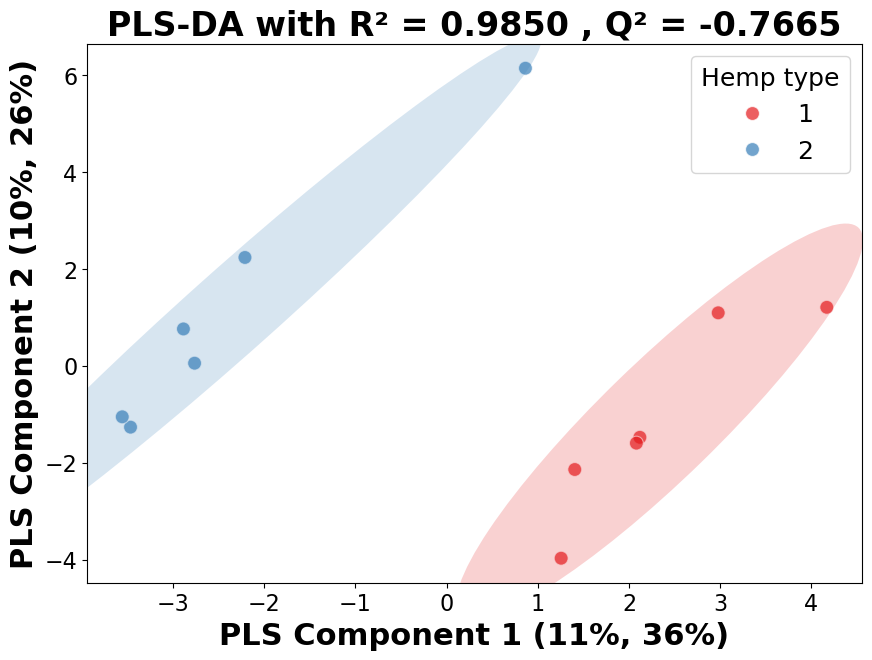

In [15]:
def confidence_ellipse(x, y, ax, n_std=2, facecolor='none', **kwargs):
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    mean = np.mean(x), np.mean(y)

    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
                      width=ell_radius_x * 2.05,
                      height=ell_radius_y * 2.05,
                      facecolor=facecolor, alpha=0.2,
                      **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean[0], mean[1])

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

plt.figure(figsize=(10, 7))
axis = plt.gca()  # Get the current axis for adding ellipses


colors = sns.color_palette("Set1", len(df['Type1'].unique()))


sns.scatterplot(data=pls_da_df, x='PLS1', y='PLS2', hue='Hemp type', palette=colors, alpha=0.7, s=100)


labels = pls_da_df['Hemp type'].unique()
for i, label in enumerate(labels):
    color = colors[i]
    confidence_ellipse(pls_da_df[pls_da_df['Hemp type'] == label]['PLS1'],
                       pls_da_df[pls_da_df['Hemp type'] == label]['PLS2'],
                       axis, edgecolor=color, linewidth=0, facecolor=color)

plt.title(f'PLS-DA with R² = {r2:.4f} , Q² = {Q2:.4f}', fontsize=24, fontweight='bold')
plt.xlabel('PLS Component 1 (11%, 36%)', fontsize=22, fontweight='bold')
plt.ylabel('PLS Component 2 (10%, 26%)', fontsize=22, fontweight='bold')
plt.legend(title='Hemp type', fontsize=18, title_fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(False)
#plt.savefig('rev-figS4-clustermap-all-pca.png', dpi=300, bbox_inches='tight')
plt.show()

In [16]:
X_var_explained = np.var(pls_da.x_scores_, axis=0) / np.sum(np.var(scaled_data, axis=0))
Y_var_explained = np.var(pls_da.y_scores_, axis=0) / np.sum(np.var(hemp_type_encoded, axis=0))

print(f"Variance Explained in X by each component: {X_var_explained}")
print(f"Variance Explained in Y by each component: {Y_var_explained}")


cumulative_X_var_explained = np.cumsum(X_var_explained)
cumulative_Y_var_explained = np.cumsum(Y_var_explained)

print(f"Cumulative Variance Explained in X: {cumulative_X_var_explained}")
print(f"Cumulative Variance Explained in Y: {cumulative_Y_var_explained}")

Variance Explained in X by each component: [0.11589022 0.10065942]
Variance Explained in Y by each component: [36.66895616 26.28768502]
Cumulative Variance Explained in X: [0.11589022 0.21654964]
Cumulative Variance Explained in Y: [36.66895616 62.95664118]


In [17]:
X_loadings = pls_da.x_loadings_
Y_loadings = pls_da.y_loadings_


X_loadings_df = pd.DataFrame(X_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=df.columns[1:])
Y_loadings_df = pd.DataFrame(Y_loadings, columns=[f'PLS_Component_{i+1}' for i in range(pls_da.n_components)], index=['Type1'])

print("X Loadings:")
print(X_loadings_df)
print("\nY Loadings:")
print(Y_loadings_df)

X Loadings:
                                       PLS_Component_1  PLS_Component_2
(2R,4R)-2,4 imethyl-1-heptanol               -0.117772         0.035779
(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol        -0.241213        -0.079597
(3methyl,24R)-ergost-5-en-3-ol               -0.180000        -0.154896
(E)-24-Propylidenecholesterol                -0.117772         0.035779
1-Docosanol                                  -0.161621         0.020126
...                                                ...              ...
Trilinolein                                  -0.112780         0.002567
Triterpenoid                                 -0.129465        -0.197881
Tyramine                                      0.121606         0.051418
Vitamin E                                    -0.141446        -0.059456
Vitamin E succinate (calcium)                -0.168402        -0.180926

[61 rows x 2 columns]

Y Loadings:
       PLS_Component_1  PLS_Component_2
Type1        -0.316218         0.178664


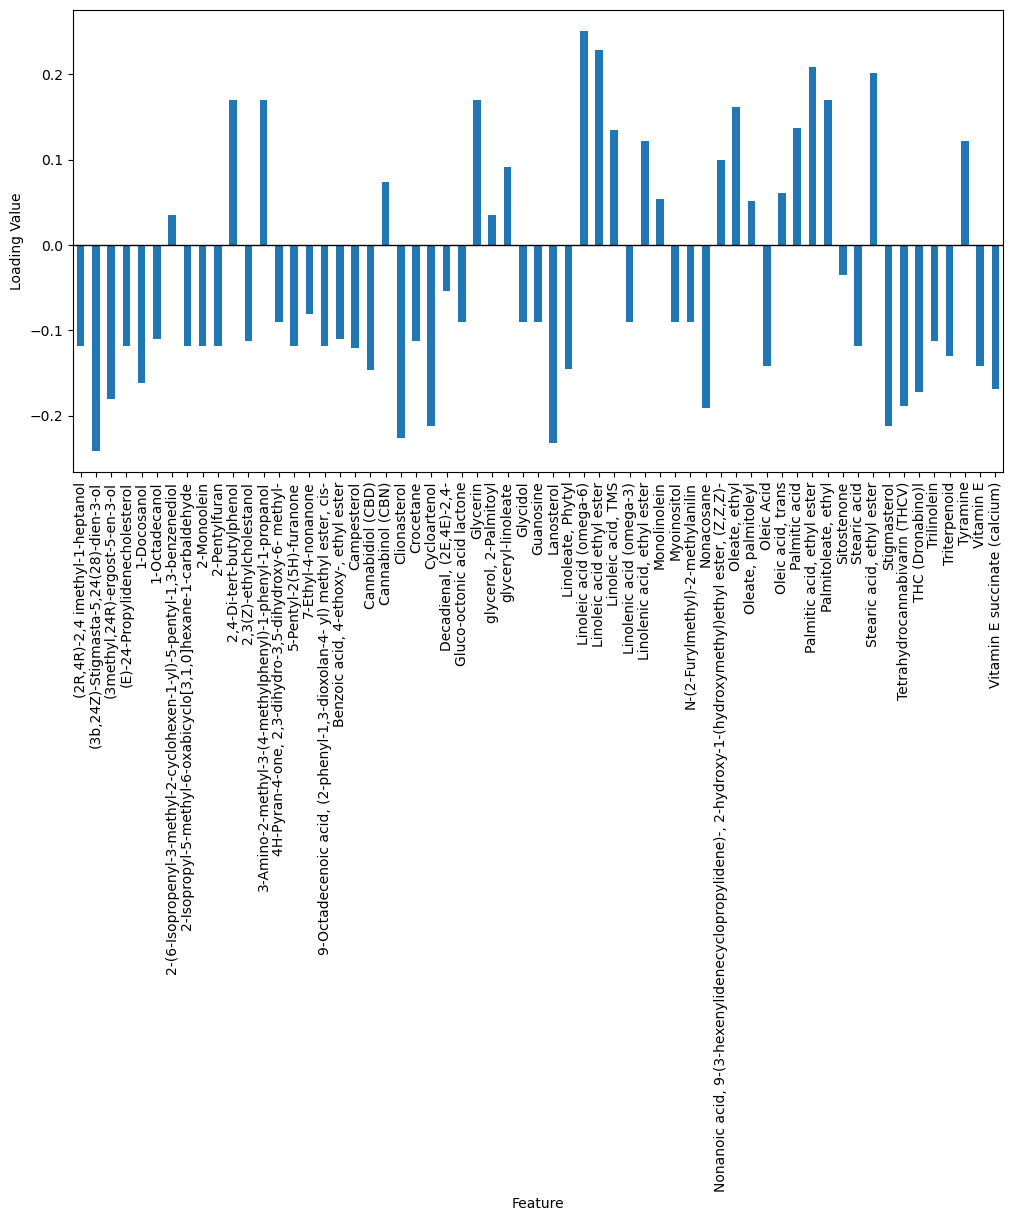

In [18]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_1'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
plt.show()

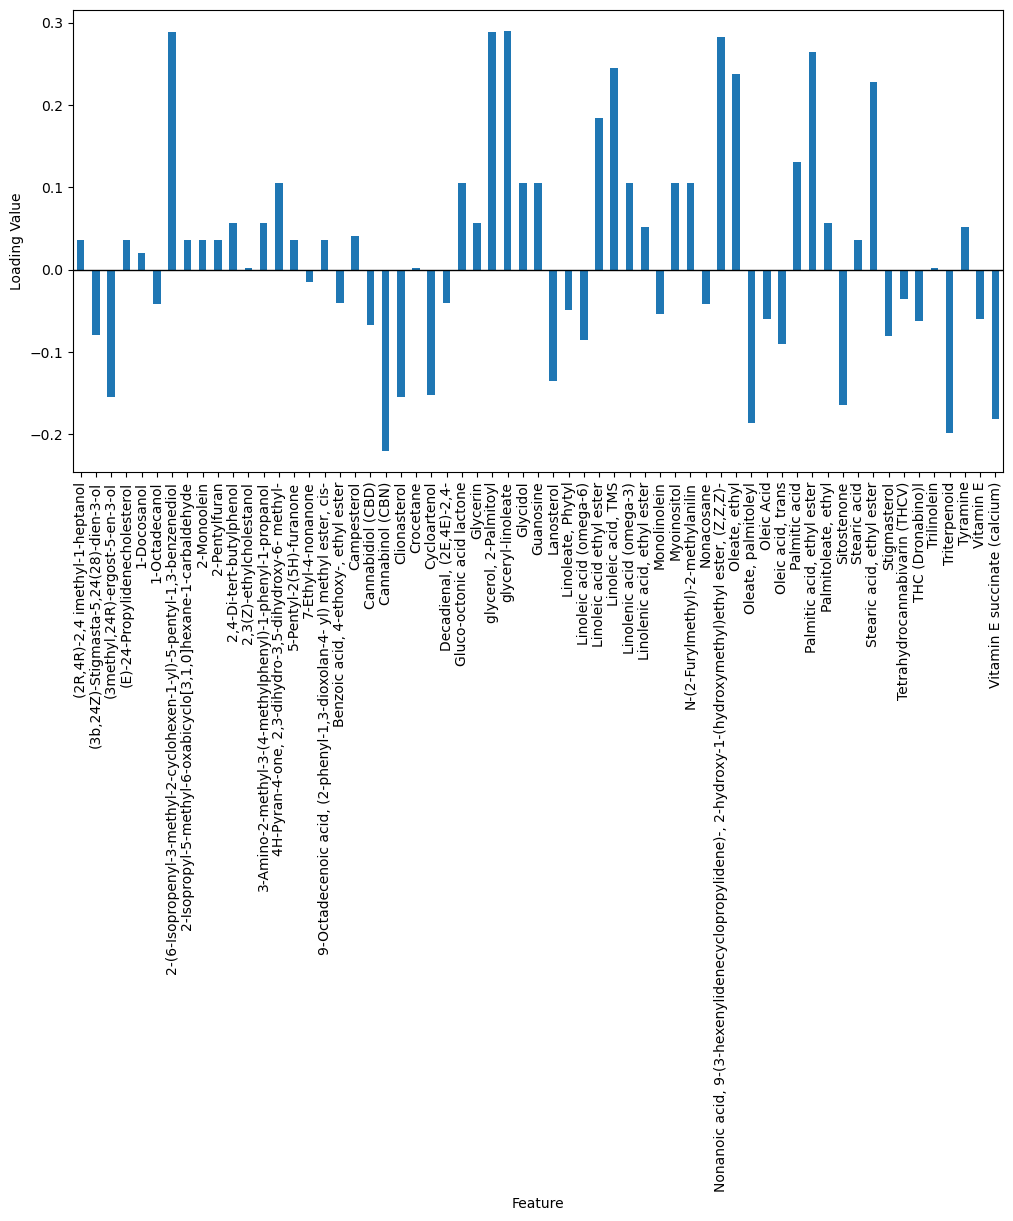

In [19]:
plt.figure(figsize=(12, 6))
X_loadings_df['PLS_Component_2'].plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
plt.show()

In [20]:
def calculate_vip(pls, X):
    t = pls_da.x_scores_
    w = pls_da.x_weights_
    q = pls_da.y_loadings_

    p, h = w.shape
    vips = np.zeros(p)
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([np.sum((t[:, j] ** 2) * (w[i, j] ** 2) * s[j])
                          for j in range(h)])
        vips[i] = np.sqrt(p * (weight.sum() / total_s))

    return vips

vip_scores = calculate_vip(pls_da, scaled_data)
print(f"VIP Scores: {vip_scores}")

VIP Scores: [ 7.87847809 13.85642304  8.62747009  7.87847809 11.13459796  5.4393642
 12.81815261  7.87847809  7.87847809  7.87847809  8.4095235   7.89991271
  8.4095235   8.15182298  7.87847809  3.84888433  7.87847809  5.4329179
  9.26567179  8.12222079 12.61292977 11.44598598  7.89991271 10.74234713
  2.72893085  8.15182298  8.4095235  12.81815261  9.83228896  8.15182298
  8.15182298 12.14666399  7.98789687 19.36995197 10.40602351  7.49281147
  8.15182298  7.87068814  5.3384602   8.15182298  8.15182298 11.38646279
  9.19433666  9.20600715  9.11748461  7.95083471  5.33367534  6.44750703
 10.00223503  8.4095235   5.70701904  7.87847809  9.10767995 11.81821348
 10.94351082  9.45943562  7.89991271  5.90882646  7.87068814  7.95083471
  7.72074487]


In [21]:
feature_names = df.columns[1:]
feature_names

Index(['(2R,4R)-2,4 imethyl-1-heptanol',
       '(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol',
       '(3methyl,24R)-ergost-5-en-3-ol', '(E)-24-Propylidenecholesterol',
       '1-Docosanol', '1-Octadecanol',
       '2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol',
       '2-Isopropyl-5-methyl-6-oxabicyclo[3,1,0]hexane-1-carbaldehyde',
       '2-Monoolein', '2-Pentylfuran', '2,4-Di-tert-butylphenol',
       '2,3(Z)-ethylcholestanol',
       '3-Amino-2-methyl-3-(4-methylphenyl)-1-phenyl-1-propanol',
       '4H-Pyran-4-one, 2,3-dihydro-3,5-dihydroxy-6- methyl-',
       '5-Pentyl-2(5H)-furanone', '7-Ethyl-4-nonanone',
       '9-Octadecenoic acid, (2-phenyl-1,3-dioxolan-4- yl) methyl ester, cis-',
       'Benzoic acid, 4-ethoxy-, ethyl ester', 'Campesterol',
       'Cannabidiol (CBD)', 'Cannabinol (CBN)', 'Clionasterol', 'Crocetane',
       'Cycloartenol', 'Decadienal, (2E,4E)-2,4-',
       'Gluco-octonic acid lactone', 'Glycerin', 'glycerol, 2-Palmitoyl',
       'glyceryl-

In [22]:
vip_score_df = pd.DataFrame({
    'VIP score': vip_scores
}, index=df_features.columns)

In [23]:
vip_score_df

,VIP score
"(2R,4R)-2,4 imethyl-1-heptanol",7.878478
"(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol",13.856423
"(3methyl,24R)-ergost-5-en-3-ol",8.627470
(E)-24-Propylidenecholesterol,7.878478
1-Docosanol,11.134598
...,...
Trilinolein,7.899913
Triterpenoid,5.908826
Tyramine,7.870688
Vitamin E,7.950835


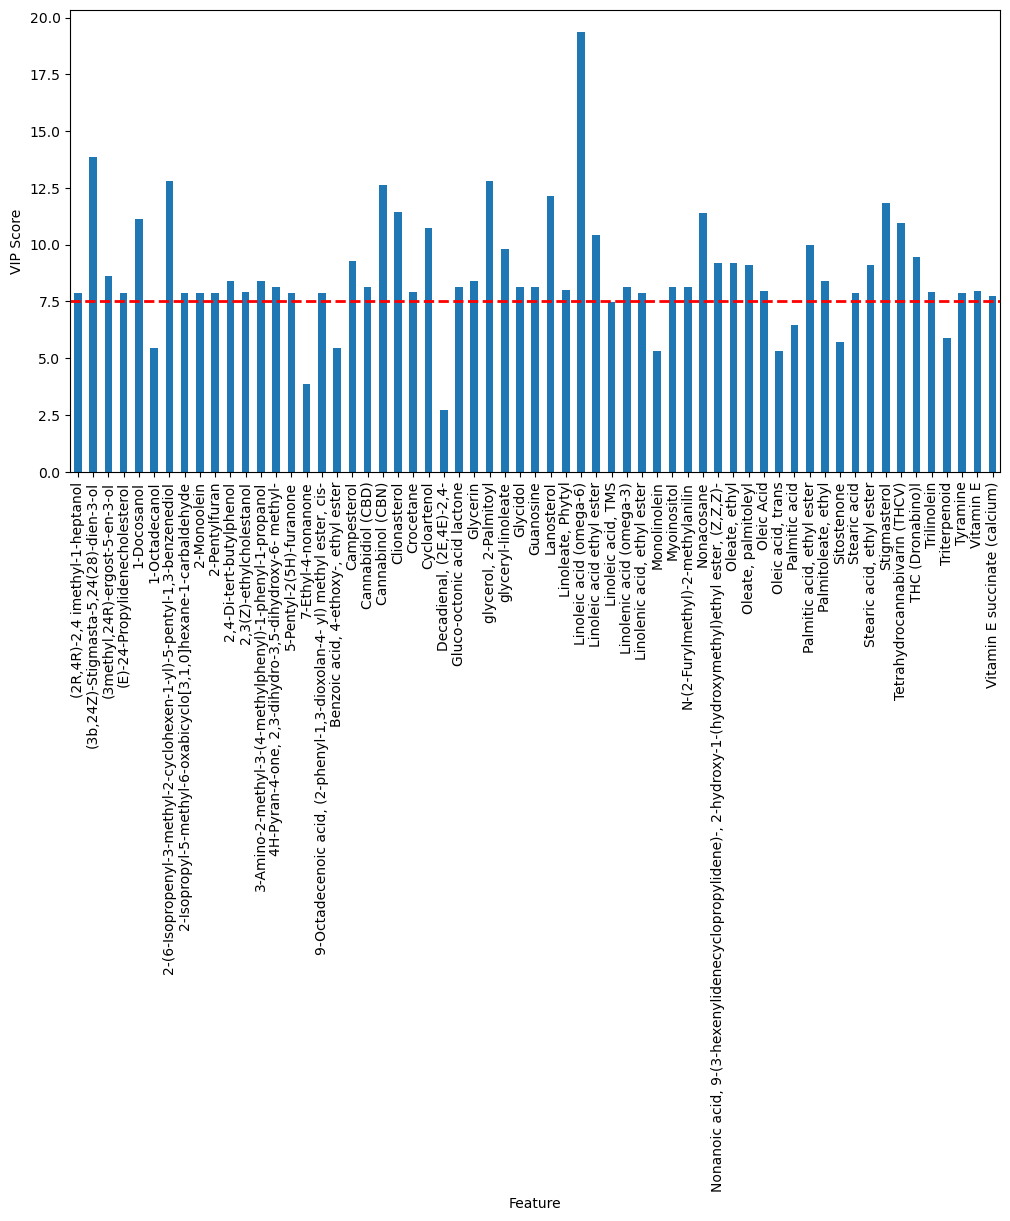

In [28]:
plt.figure(figsize=(12, 6))
vip_score_df['VIP score'].plot(kind='bar')
plt.axhline(y=7.5, color='red', linestyle='--', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('VIP Score')
plt.grid(False)
plt.show()

In [25]:
coefficients = pls_da.coef_

discrimination_power = np.abs(coefficients).mean(axis=1) 

print(discrimination_power)

[0.02538553]


In [26]:
df_vip_sorted = vip_score_df.sort_values(by='VIP score', ascending=False)
df_vip_sorted

,VIP score
Linoleic acid (omega-6),19.369952
"(3b,24Z)-Stigmasta-5,24(28)-dien-3-ol",13.856423
"glycerol, 2-Palmitoyl",12.818153
"2-(6-Isopropenyl-3-methyl-2-cyclohexen-1-yl)-5-pentyl-1,3-benzenediol",12.818153
Cannabinol (CBN),12.612930
...,...
"Benzoic acid, 4-ethoxy-, ethyl ester",5.432918
Monolinolein,5.338460
"Oleic acid, trans",5.333675
7-Ethyl-4-nonanone,3.848884


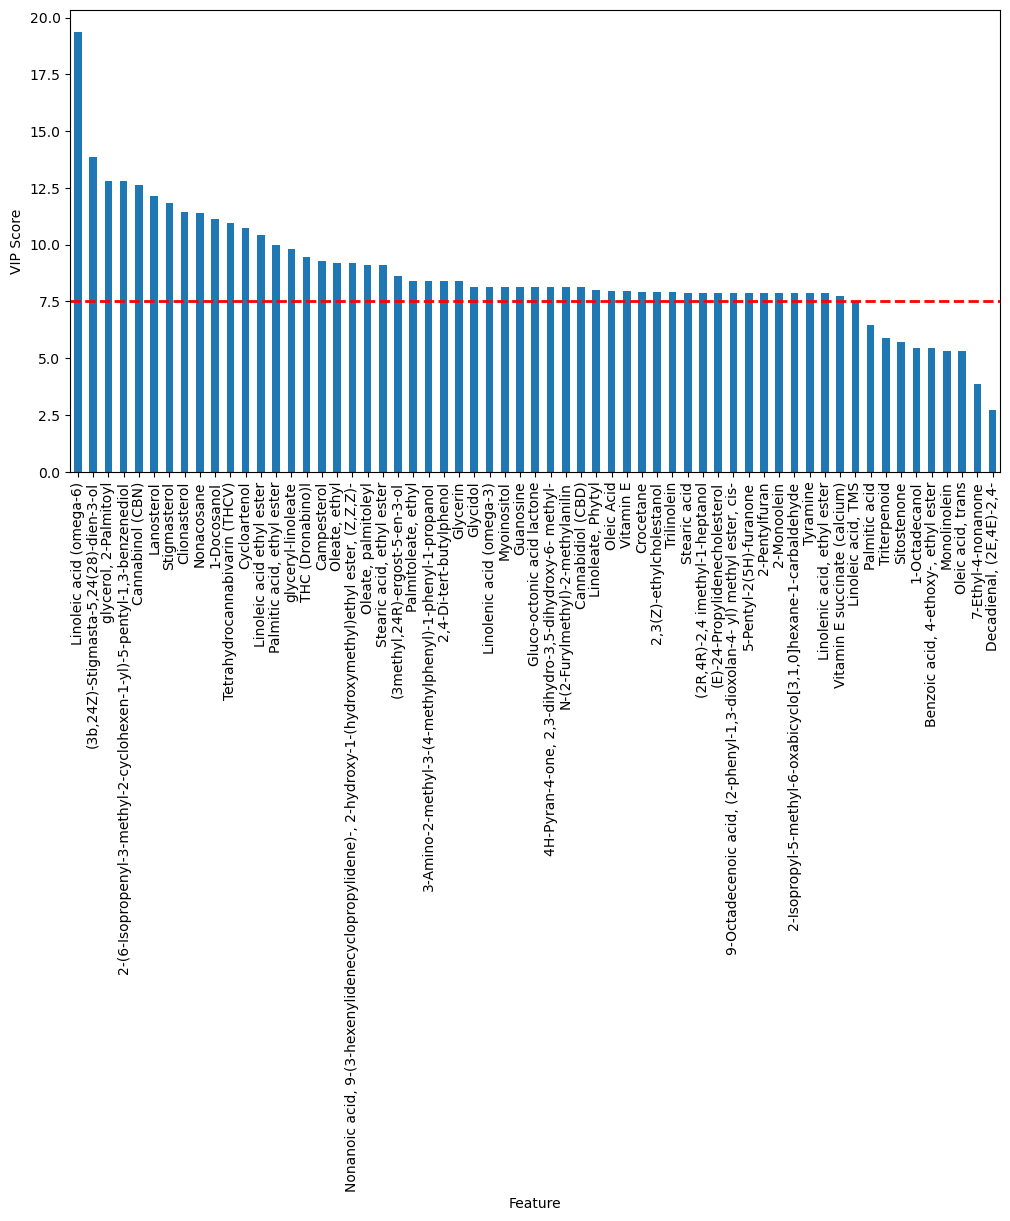

In [29]:
plt.figure(figsize=(12, 6))
df_vip_sorted['VIP score'].plot(kind='bar')
plt.axhline(y=7.5, color='red', linestyle='--', linewidth=2)
plt.xlabel('Feature')
plt.ylabel('VIP Score')
plt.grid(False)
plt.show()